In [1]:
import numpy as np, healpy as hp, pickle, prjlib, curvedsky, plottools as pl
from matplotlib.pyplot import *

In [2]:
def view_map(alm,nside,lmax,min=-.1,max=.1):
    Map = curvedsky.utils.hp_alm2map(nside,lmax,lmax,alm[:lmax+1,:lmax+1])
    hp.mollview(Map,min=min,max=max)

In [3]:
Lmax, lmax = 4096, 2048
ntype = 'base_roll50'
l = np.linspace(0,lmax,lmax+1)
L = np.linspace(0,Lmax,Lmax+1)
plac = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype)
plaw = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype=ntype)
pid = prjlib.analysis_init(t='id',ntype='cv')
psa = prjlib.analysis_init(t='sa',freq='com',ntype=ntype)
pco = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype)
vmin, vmax = -3e-6, 3e-6

In [4]:
# load windows
Msa, __ = prjlib.window('sa',ascale=0.)
Mla, wnla = prjlib.window('la',ascale=0.,nside=psa.nside)
mco = np.average(Mla)+np.average(Msa)-np.average(Mla*Msa)
print(wnla[0],mco)

0.2917563120524089 0.39795013765494036


Filtered maps

In [5]:
#cEalm = pickle.load(open(pco.fcmb.alms['o']['E'][1],"rb"))[:lmax+1,:lmax+1]
#cBalm = pickle.load(open(pco.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1]
#view_map(cEalm,psa.nside,lmax,min=vmin,max=vmax)

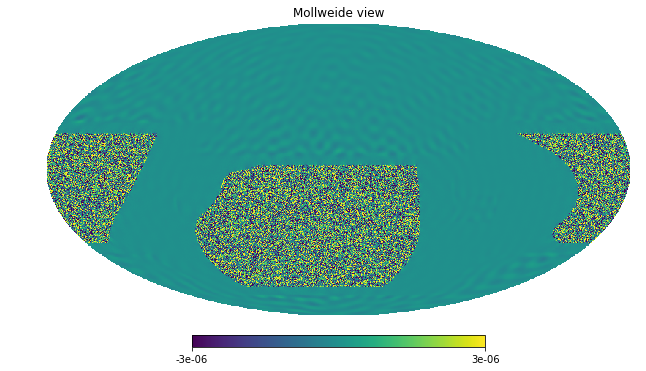

In [6]:
Elaw = pickle.load(open(plaw.fcmb.alms['o']['E'][1],"rb"))[:plaw.lmax+1,:plaw.lmax+1]
Blaw = pickle.load(open(plaw.fcmb.alms['o']['B'][1],"rb"))[:plaw.lmax+1,:plaw.lmax+1]
view_map(Elaw,psa.nside,lmax,min=vmin,max=vmax)

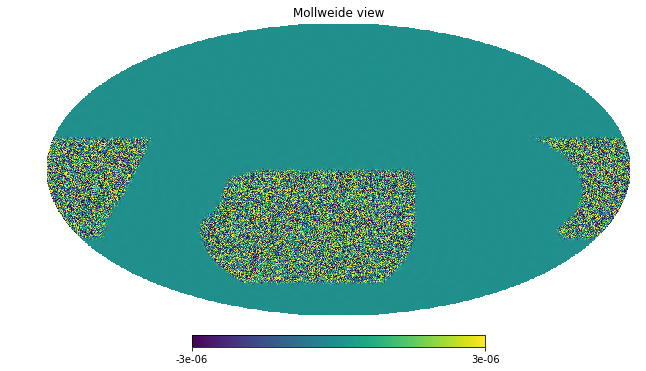

In [7]:
Elac = pickle.load(open(plac.fcmb.alms['o']['E'][1],"rb"))[:plaw.lmax+1,:plaw.lmax+1]
Blac = pickle.load(open(plac.fcmb.alms['o']['B'][1],"rb"))[:plaw.lmax+1,:plaw.lmax+1]
view_map(Elac,psa.nside,lmax,min=vmin,max=vmax)

/project/projectdirs/sobs/delensing/cmbsims/alm//o_E_cocom_base_roll50_cinv_0001.pkl


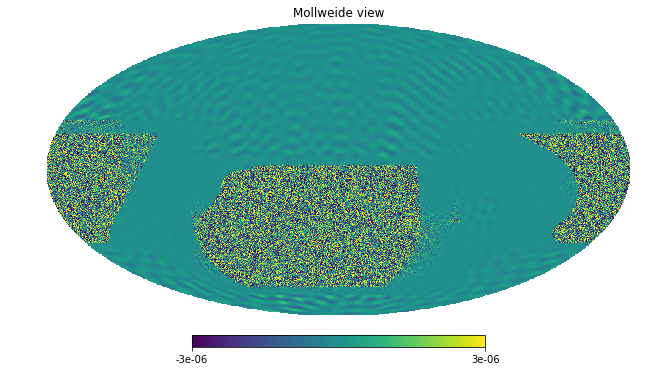

In [8]:
Eco = pickle.load(open(pco.fcmb.alms['o']['E'][1],"rb"))[:pco.lmax+1,:pco.lmax+1]
Bco = pickle.load(open(pco.fcmb.alms['o']['B'][1],"rb"))[:pco.lmax+1,:pco.lmax+1]
print(pco.fcmb.alms['o']['E'][1])
view_map(Eco,psa.nside,pco.lmax,min=vmin,max=vmax)

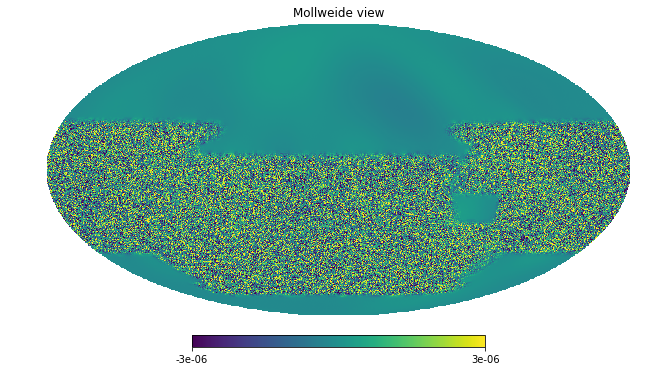

In [9]:
eco = pickle.load(open(pco.fcmb.alms['o']['E'][1].replace('_roll50',''),"rb"))[:pco.lmax+1,:pco.lmax+1]
bco = pickle.load(open(pco.fcmb.alms['o']['B'][1].replace('_roll50',''),"rb"))[:pco.lmax+1,:pco.lmax+1]
view_map(eco,psa.nside,pco.lmax,min=vmin,max=vmax)

In [10]:
Ealm = pickle.load(open(pid.fcmb.alms['o']['E'][1],"rb"))[:pid.lmax+1,:pid.lmax+1]
Balm = pickle.load(open(pid.fcmb.alms['o']['B'][1],"rb"))[:pid.lmax+1,:pid.lmax+1]

Power spectrum

In [11]:
TT, EE, BB = np.loadtxt(plac.fcmb.scl['o'],unpack=True,usecols=(1,2,3))[:,:plac.lmax+1]
TN, EN, BN = np.loadtxt(plac.fcmb.scl['n'],unpack=True,usecols=(1,2,3))[:,:plac.lmax+1]
TT -= TN
EE -= EN
BB -= BN
WT = TT/(TT+TN+1e-30)
WE = EE/(EE+EN+1e-30)
WB = BB/(BB+BN+1e-30)

In [12]:
#wEE = curvedsky.utils.alm2cl(plaw.lmax,Elaw)/wnla[0]
#WEE = curvedsky.utils.alm2cl(plac.lmax,Elac)/wnla[2]
#wBB = curvedsky.utils.alm2cl(plaw.lmax,Blaw)/wnla[0]
#WBB = curvedsky.utils.alm2cl(plac.lmax,Blac)/wnla[2]
#xEE = curvedsky.utils.alm2cl(plaw.lmax,Elaw,Ealm)/wnla[0]
#xBB = curvedsky.utils.alm2cl(plaw.lmax,Blaw,Balm)/wnla[0]
cEE = curvedsky.utils.alm2cl(pco.lmax,Eco)/mco
cBB = curvedsky.utils.alm2cl(pco.lmax,Bco)/mco
cee = curvedsky.utils.alm2cl(pco.lmax,eco)/.577
cbb = curvedsky.utils.alm2cl(pco.lmax,bco)/.577
wTT, wEE, wBB = np.loadtxt(plaw.fcmb.scl['o'],unpack=True,usecols=(1,2,3))[:,:plaw.lmax+1]
WTT, WEE, WBB = np.loadtxt(plac.fcmb.scl['o'],unpack=True,usecols=(1,2,3))[:,:plac.lmax+1]
xTT, xEE, xBB = np.loadtxt(plaw.fcmb.scl['x'],unpack=True,usecols=(1,2,3))[:,:plaw.lmax+1]

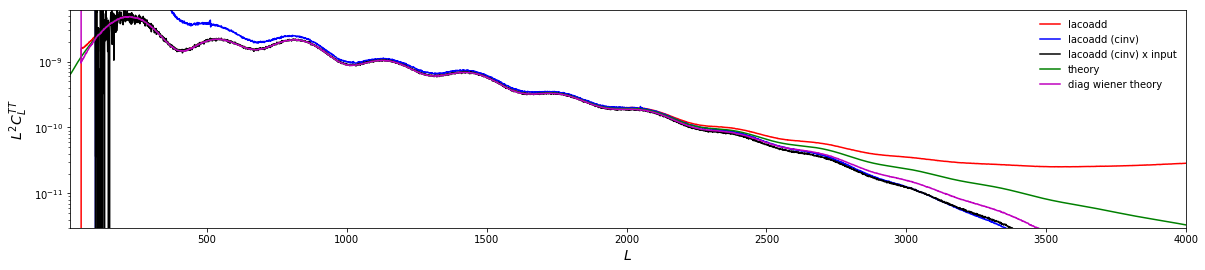

In [13]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-12,ymax=6e-9,ylog=True,ylab=r'$L^2C_L^{TT}$')
plot(L,L**2*WTT,color='r',label='lacoadd')
plot(L,L**2*wTT,color='b',label='lacoadd (cinv)')
plot(L,L**2*xTT,color='k',label='lacoadd (cinv) x input')
plot(L,L**2*plaw.lTT,color='g',label='theory')
plot(L,L**2*WT*TT,color='m',label='diag wiener theory')
legend()

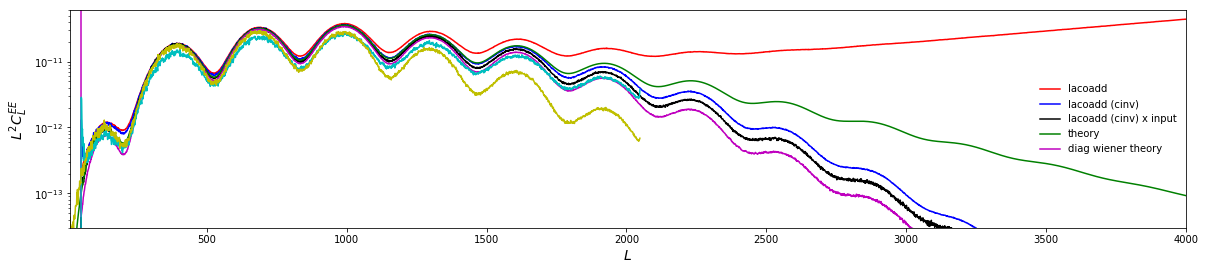

In [14]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-14,ymax=6e-11,ylog=True,ylab=r'$L^2C_L^{EE}$')
plot(L,L**2*WEE,color='r',label='lacoadd')
plot(L,L**2*wEE,color='b',label='lacoadd (cinv)')
plot(L,L**2*xEE,color='k',label='lacoadd (cinv) x input')
plot(L,L**2*plaw.lEE,color='g',label='theory')
plot(L,L**2*WE*EE,color='m',label='diag wiener theory')
plot(l,cEE*l**2,color='c')
plot(l,cee*l**2,color='y')
legend()

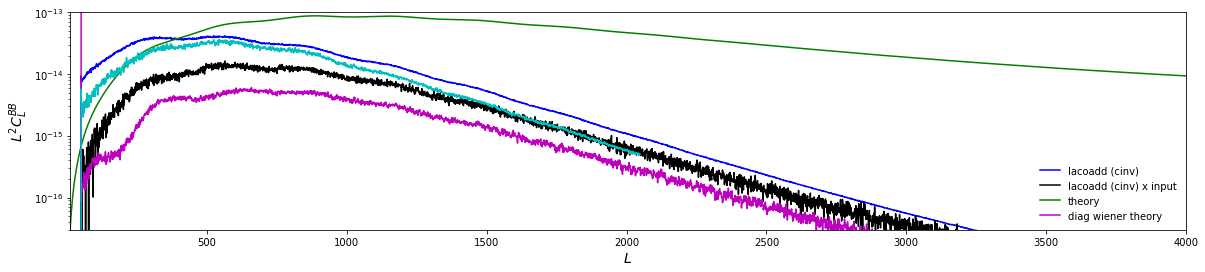

In [15]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-17,ymax=1e-13,ylog=True,ylab=r'$L^2C_L^{BB}$')
#plot(l,l**2*cBB,color='r',label='cocoadd')
plot(L,L**2*wBB,color='b',label='lacoadd (cinv)')
plot(L,L**2*xBB,color='k',label='lacoadd (cinv) x input')
plot(L,L**2*plaw.lBB,color='g',label='theory')
plot(L,L**2*WB*BB,color='m',label='diag wiener theory')
plot(l,cBB*l**2,color='c')
legend()

In [16]:
#Ealm = pickle.load(open(pid.fcmb.alms['o']['E'][2],"rb"))[:pid.lmax+1,:pid.lmax+1]
#Balm = pickle.load(open(pid.fcmb.alms['o']['B'][2],"rb"))[:pid.lmax+1,:pid.lmax+1]
xEE = curvedsky.utils.alm2cl(pco.lmax,Eco,Ealm[:pco.lmax+1,:pco.lmax+1])
iEE = curvedsky.utils.alm2cl(pco.lmax,Ealm[:pco.lmax+1,:pco.lmax+1])
xBB = curvedsky.utils.alm2cl(pco.lmax,Bco,Balm[:pco.lmax+1,:pco.lmax+1])
iBB = curvedsky.utils.alm2cl(pco.lmax,Balm[:pco.lmax+1,:pco.lmax+1])

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


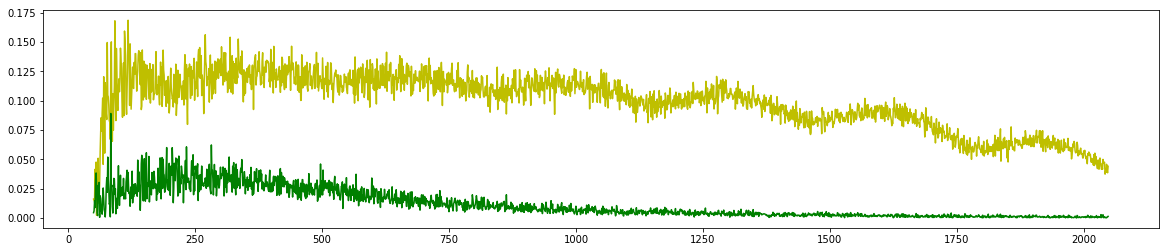

In [17]:
plot(l,xEE**2/cEE/iEE,color='y')
plot(l,xBB**2/cBB/iBB,color='g')